In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os.path
from io import BytesIO

import numpy as np
import pandas as pd

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 13

In [2]:
oid = '695211200077906'
m_sep = 16.6

gaia_ra = np.array([10.07633011214, 10.07691035310])
gaia_de = np.array([+41.60933874390, +41.60983555758])

In [3]:
path = '../data/695211200077906.csv'
if os.path.exists('../data/695211200077906.csv'):
    table_coord = pd.read_csv(path)
else:
    url = 'https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?FORMAT=CSV&ID={}'.format(oid)
    table_coord = pd.read_csv(url)

In [4]:
data = BytesIO(b'''mjd	mag	fwhm
58324.46707	16.888	2.48
58325.28382	16.974	2.49
58325.49042	16.938	2.15
58326.35757	16.919	2.51
58326.38413	16.937	1.93
58326.40996	16.392	3.96
58327.37939	16.903	1.97
58327.40676	16.366	4.15
58327.43618	16.913	1.60
58328.37850	16.937	1.85
''')
table_fwhm = pd.read_csv(data, sep='\t')

In [5]:
def plot_coord(ax, table):
    idx = table.mag > m_sep
    ra = (table.ra - table.ra.mean()) * 3600 * np.cos(np.radians(table.dec))
    dec = (table.dec - table.dec.mean()) * 3600
    
    ax.set_xlabel(r'$\Delta \alpha \cdot \cos{\delta}$, arcsec')
    ax.set_ylabel(r'$\Delta \delta$, arcsec')
    ax.plot(ra[~idx], dec[~idx], ls='', marker='^', ms=8, label=r'$m < {}$\,mag'.format(m_sep))
    ax.plot(ra[idx], dec[idx], ls='', marker='v', ms=8, label=r'$m > {}$\,mag'.format(m_sep))
    g_ra = (gaia_ra - table.ra.mean()) * 3600 * np.cos(np.radians(gaia_de))
    g_de = (gaia_de - table.dec.mean()) * 3600
    ax.plot(g_ra, g_de, ls='', marker='X', color='black', ms=18, label='')
    ax.legend()
    
def plot_fwhm(ax, table):
    ax.set_xlabel(r'FWHM, arcsec')
    ax.set_ylabel(r'm')
    ax.invert_yaxis()
    ax.plot(table.fwhm, table.mag, 'x', ms=10, color='black')

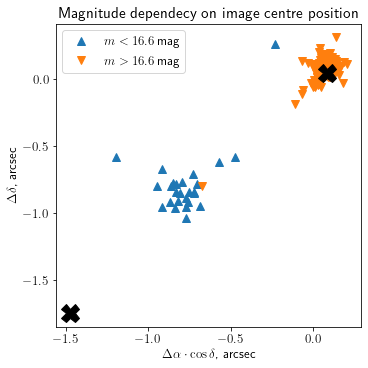

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
# fig.suptitle(r'Magnitude dependecy on PSF position')

# plot_fwhm(ax1, table_fwhm)
plot_coord(ax, table_coord)
plt.title(r'Magnitude dependecy on image centre position')

plt.savefig('../figs/{}_psf.pdf'.format(oid))